# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
import nltk
%matplotlib inline

In [2]:
nltk.download('vader_lexicon')
# Read your api key environment variable

load_dotenv()
api_key = os.getenv("NEWS_API_T")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)


In [6]:
bitcoin_news_en["articles"][1]

{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [7]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [8]:
ethereum_news_en["articles"][2]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Wilson',
 'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
 'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
 'url': 'https://www.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
 'publishedAt': '2020-11-23T14:16:00Z',
 'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'}

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        
        
        bitcoin_sentiments.append({
            "Compound" : compound,
            "Positive" : pos,
            "Negative" : neg,
            "Neutral" : neu,
            "Text": text,
        })
        
    except AttributeError:
        pass
        
        
        
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()  

,Compound,Positive,Negative,Neutral,Text
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [10]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        
        
        ethereum_sentiments.append({
            "Compound" : compound,
            "Positive" : pos,
            "Negative" : neg,
            "Neutral" : neu,
             "Text": text
            
        })
        
    except AttributeError:
        pass
        
        
        
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.170479,0.056895,0.014421,0.928684
std,0.328269,0.066958,0.047886,0.087898
min,-0.670500,0.000000,0.000000,0.737000
25%,0.000000,0.000000,0.000000,0.860500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.199000,1.000000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum.

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
wnlemm = WordNetLemmatizer()

In [15]:
# Expand the default stopwords list if necessary
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    tokens = word_tokenize(re_clean)
    
    #Convert into lower case.dh 
    tokens = [x.lower() for x in tokens]
      
    # Remove the punctuation
    tokens = [x for x in tokens if x not in punctuation]

    # Remove the stop words
    sw = set(stopwords.words('english'))
    tokens = [x for x in tokens if x not in sw]
    
    # Lemmatize Words into root words
    tokens = [wnlemm.lemmatize(x) for x in tokens]

    return tokens


In [17]:
# Create a new tokens column for bitcoin
bitcoin_df["Tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [18]:
# Create a new tokens column for ethereum
ethereum_df["Tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Generate the Bitcoin N-grams where N=2

bitcoin_ngrams = ngrams(tokenizer(bitcoin_df["Text"].str.cat()), 2)

token_count(bitcoin_ngrams)



[(('photo', 'representation'), 6),
 (('virtual', 'currency'), 6),
 (('representation', 'virtual'), 4),
 (('currency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('charsby', 'reuters'), 3),
 (('reuters', 'stafffile'), 3),
 (('stafffile', 'photo'), 3),
 (('reutersdado', 'ruvicillustrationlondon'), 3),
 (('ruvicillustrationlondon', 'reuters'), 3)]

In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_ngrams = ngrams(tokenizer(ethereum_df["Text"].str.cat()), 2)
token_count(ethereum_ngrams)

[(('virtual', 'currency'), 9),
 (('photo', 'representation'), 7),
 (('charsby', 'reuters'), 6),
 (('representation', 'virtual'), 6),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'illustration'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('november', 'reutersdado'), 5)]

In [23]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(bitcoin_df["Text"].str.cat()))

[('bitcoin', 11),
 ('currency', 8),
 ('reuters', 8),
 ('photo', 6),
 ('representation', 6),
 ('virtual', 6),
 ('cryptocurrency', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5)]

In [24]:
# Get the top 10 words for Ethereum
token_count(tokenizer(ethereum_df["Text"].str.cat()))

[('reuters', 15),
 ('bitcoin', 13),
 ('currency', 10),
 ('photo', 9),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7),
 ('taken', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

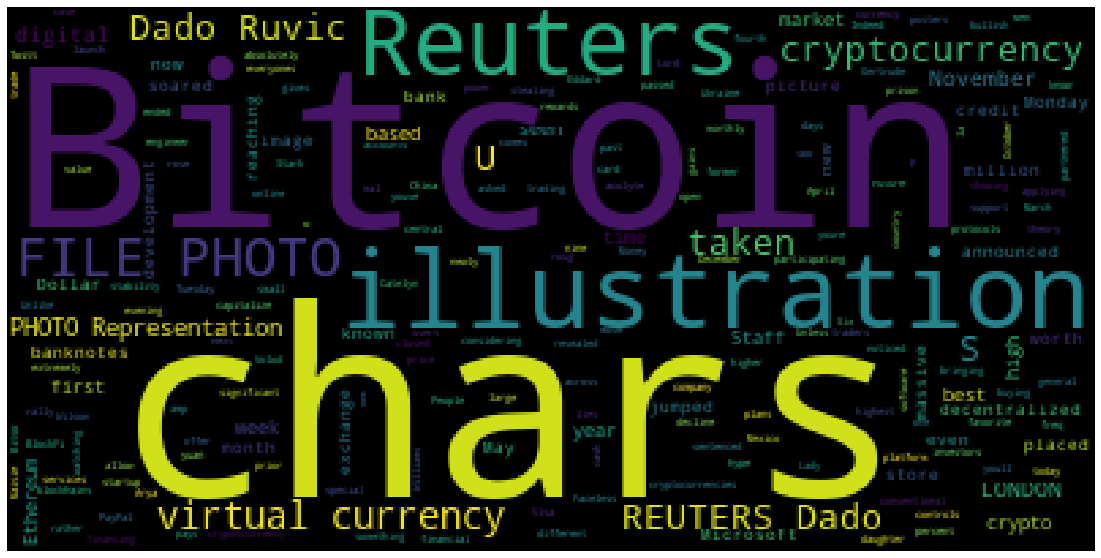

In [26]:
# Generate the Bitcoin word cloud
bitcoin_wc= WordCloud().generate(bitcoin_df["Text"].str.cat())
plt.imshow(bitcoin_wc)
plt.axis("off")
plt.show()

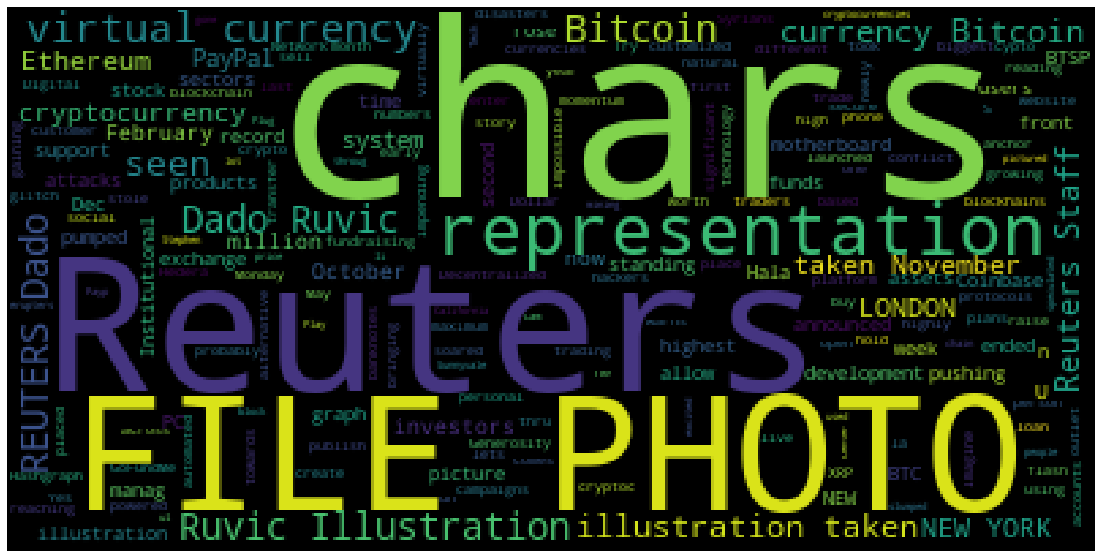

In [27]:
# Generate the Ethereum word cloud
ethereum_wc= WordCloud().generate(ethereum_df["Text"].str.cat())
plt.imshow(ethereum_wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [97]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
bitcoin_text = ' '.join(bitcoin_df['Text'])
bitcoin_text

"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars] Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives t

In [31]:
# Run the NER processor on all of the text

doc = nlp(bitcoin_text)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)    

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
Visa ORG
first ORDINAL
Bitcoin GPE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin HarperBusiness ORG
BBC News ORG
Bitcoin GPE
above $17,000 MON

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
ethereum_text = ' '.join(ethereum_df['Text'])
ethereum_text

"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the

In [36]:
# Run the NER processor on all of the text
doc_ethereum = nlp(ethereum_text)

# Add a title to the document
doc_ethereum.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(doc_ethereum, style = "ent")

In [38]:
# List all Entities
for ent in doc_ethereum.ents:
    print(ent.text, ent.label_)  

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hala Systems ORG
Hedera ORG